In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
new=pd.read_csv("Cleaned.csv")
new.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
new

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699788,-0.043737,1.150395,0.331321,-1.246100,-1.222425,-0.255640,1.029149,-0.245712,0.432460,1.118288,0.851550,0.513546,72
699789,-0.044050,1.101153,0.331515,-1.248962,-1.222432,-0.255640,1.029146,-0.245707,0.431774,1.113843,0.849495,0.512094,72
699790,-0.050501,1.038358,0.331304,-1.246039,-1.222428,-0.255640,1.029151,-0.245708,0.431926,1.106924,0.848022,0.510517,72
699791,-0.050557,0.966232,0.331577,-1.248829,-1.222434,-0.255640,1.029147,-0.245721,0.431800,1.099826,0.846967,0.509302,72


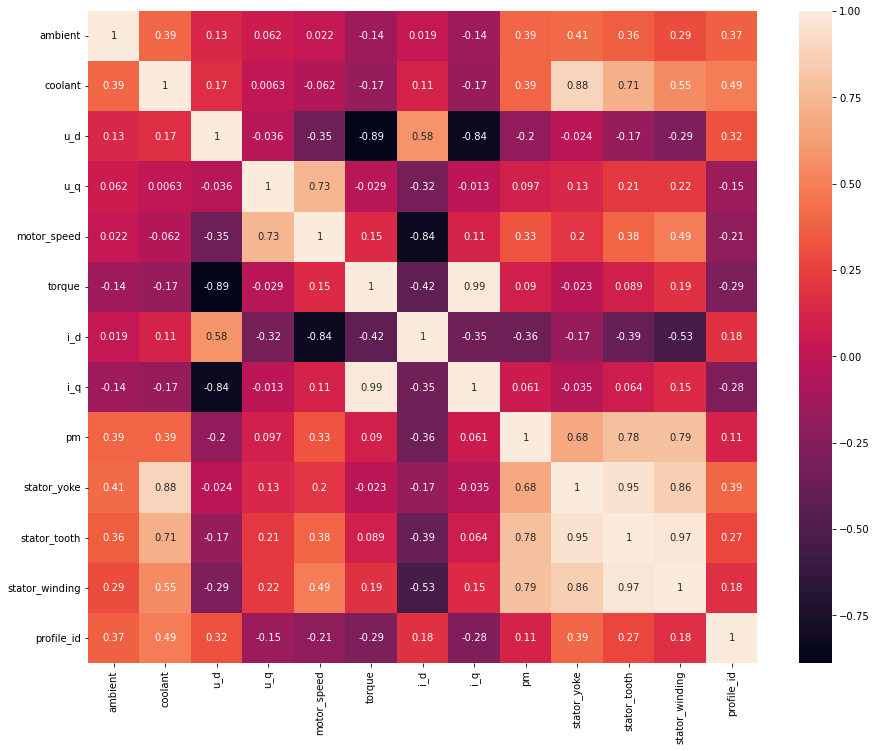

In [5]:
plt.figure(figsize=(15,12))
sns.heatmap(new.corr(), annot=True);

In [6]:
# u_d,u_q,i_d, stator_winding, stator_tooth, pm

In [7]:
corr=["u_d","u_q","i_d", "stator_winding", "stator_tooth","pm"]
# corr=["u_d","u_q","i_d", "stator_winding", "stator_tooth", "pm"]

# Linear Regression

## All Columns

In [8]:
metricdata=pd.DataFrame(columns=["Model","MSE","RMSE","MAE","R-Squared"])

In [9]:
x=new.drop("motor_speed", axis=1)
y=new["motor_speed"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [10]:
Model=LinearRegression(n_jobs=-1)

In [11]:
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)

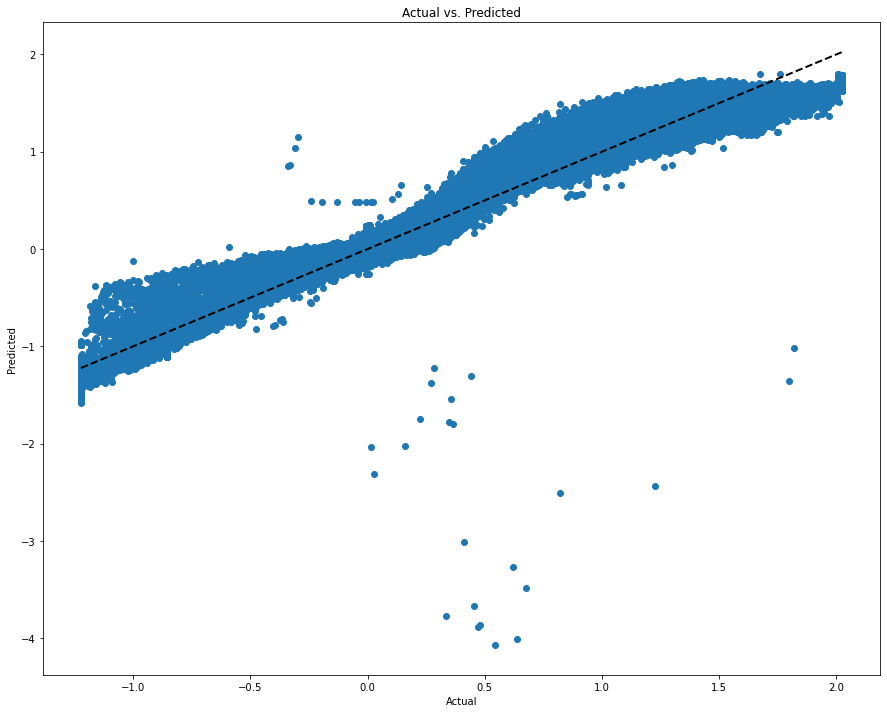

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

## highly Corr Column

In [13]:
# data splitting
x_n=new.drop("motor_speed", axis=1)[corr]
y_n=new["motor_speed"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fitting and Training model
h_linear=LinearRegression()
h_linear.fit(x_train,y_train)
y_pred=h_linear.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


MSE: 0.018673061985438163
RMSE: 0.1366494126787165
MAE: 0.09058081215007431
R-squared: 0.9838044182853433


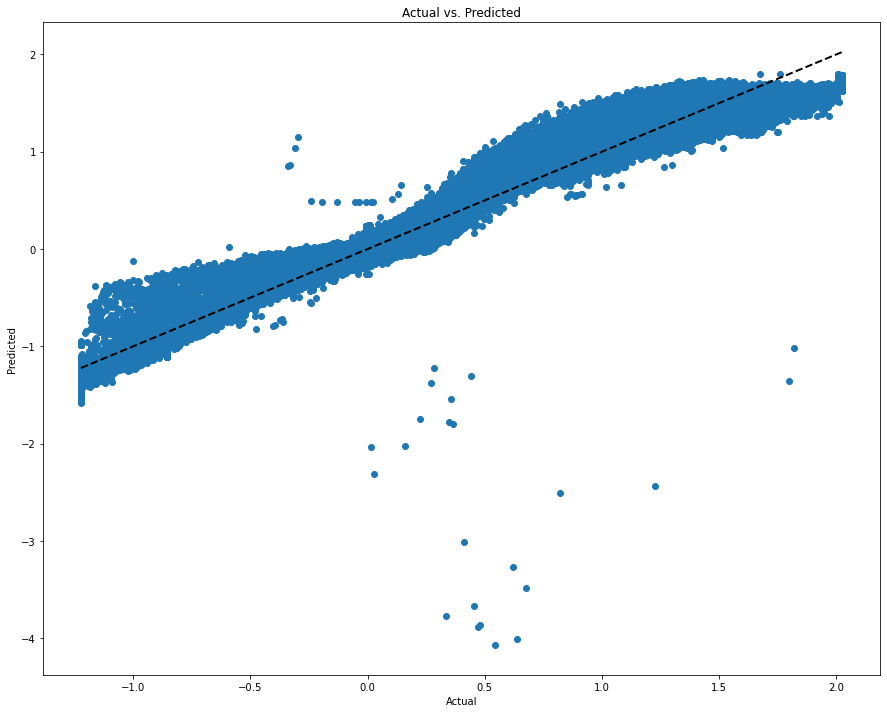

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


In [15]:
metricdata.columns

Index(['Model', 'MSE', 'RMSE', 'MAE', 'R-Squared'], dtype='object')

In [16]:
metricdata

,Model,MSE,RMSE,MAE,R-Squared


In [45]:
def model(model,x,y,metricdata, Model_name="Default", plot=False, update_metric=False):
    if len(x.columns)==12:
        All_column="All"
    else:
        All_column=len(x.columns)
    '''if plot=True it will create a plot of actual vs predicted value '''
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate R-squared (Coefficient of Determination)
    r2 = r2_score(y_test, y_pred)
    if plot==True:
        plt.figure(figsize=(15,12))
        plt.scatter(y_test, y_pred)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Actual vs. Predicted')
        #plt.show()
    else:
        metric= pd.DataFrame({'Model':Model_name, 'MSE':mse, 'RMSE':rmse, 'MAE':mae, 'R-Squared':r2,"Columns":All_column},index=[1])
    if update_metric==True:
        metricdata=pd.concat([metricdata,metric], ignore_index=True)
        return metricdata
    elif plot==True:
        return plt.show()
    else:
        return metric

In [46]:
model(LinearRegression(),x,y,metricdata, Model_name="LinearRegression")

,Model,MSE,RMSE,MAE,R-Squared,Columns
1,LinearRegression,0.018673,0.136649,0.090581,0.983804,All


In [47]:
metricdata=pd.DataFrame(columns=["Model","MSE","RMSE","MAE","R-Squared","Columns"])

In [48]:
metricdata=pd.concat([metricdata,model(LinearRegression(),x,y,metricdata,Model_name="LinearRegression")], ignore_index=True)
metricdata

,Model,MSE,RMSE,MAE,R-Squared,Columns
0,LinearRegression,0.018673,0.136649,0.090581,0.983804,All


In [49]:
metricdata=pd.concat([metricdata,model(LinearRegression(),x_n,y_n,metricdata,Model_name="LinearRegression")], ignore_index=True)
metricdata

,Model,MSE,RMSE,MAE,R-Squared,Columns
0,LinearRegression,0.018673,0.136649,0.090581,0.983804,All
1,LinearRegression,0.047447,0.217824,0.150797,0.958848,6


## Elasticnet

In [76]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic_net = ElasticNet()

# Define the hyperparameter grid to search
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # List of alpha values to try
    'l1_ratio': [0.1, 0.5, 0.9]       # List of l1_ratio values to try
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)

# Fit the model to your training data
grid_search.fit(x,y)
best_model = grid_search.best_estimator_

In [77]:
metricdata=model(grid_search,x,y,metricdata,"ElasticNet",update_metric=True)

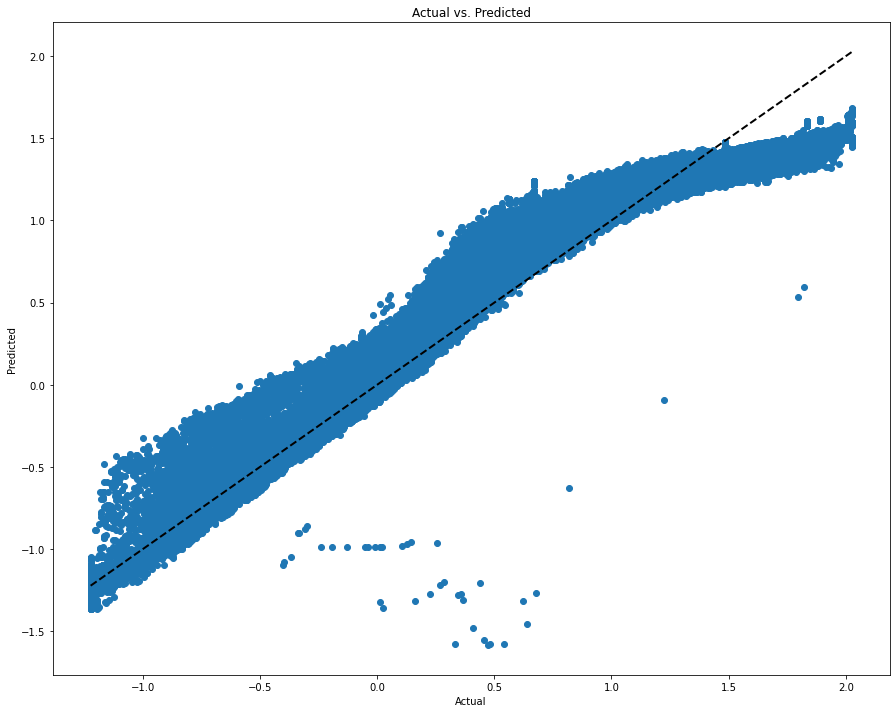

In [78]:
model(grid_search,x,y,metricdata,"ElasticNet",plot=True)

In [79]:
metricdata=model(grid_search,x_n,y_n,metricdata,"ElasticNet",update_metric=True)

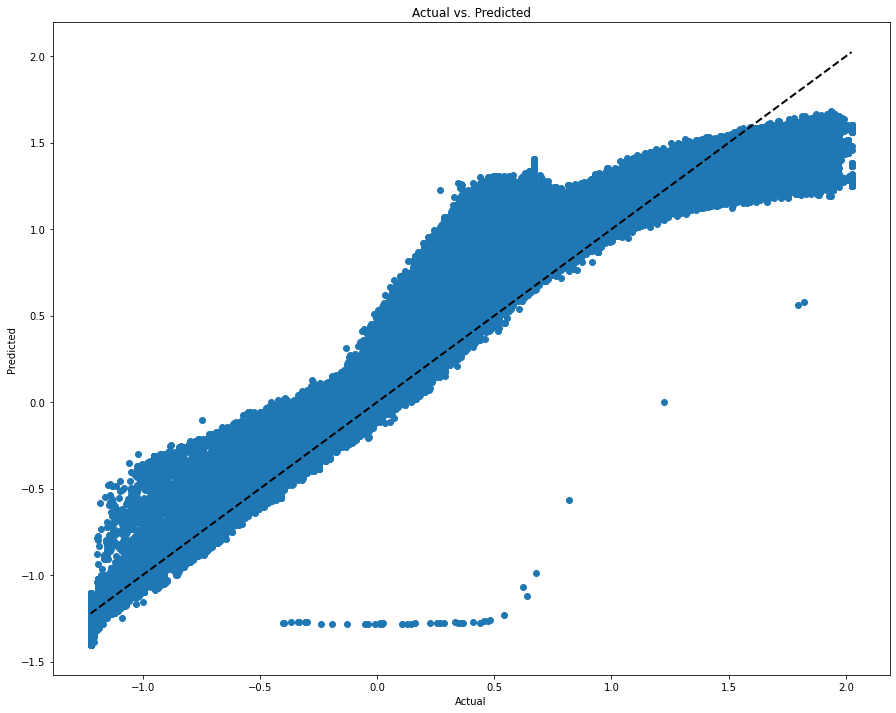

In [80]:
model(grid_search,x_n,y_n,metricdata,"ElasticNet",plot=True)

In [53]:
metricdata

,Model,MSE,RMSE,MAE,R-Squared,Columns
0,LinearRegression,0.018673,0.136649,0.090581,0.983804,All
1,LinearRegression,0.047447,0.217824,0.150797,0.958848,6
2,ElasticNet,0.027178,0.164857,0.110026,0.976428,All
3,ElasticNet,0.047636,0.218257,0.149407,0.958684,6


## LGBM

In [54]:
import lightgbm as lgb
lgb_model=lgb.LGBMRegressor()

In [55]:
metricdata=model(lgb_model,x,y,metricdata,"Lightgbm",update_metric=True)
metricdata

,Model,MSE,RMSE,MAE,R-Squared,Columns
0,LinearRegression,0.018673,0.136649,0.090581,0.983804,All
1,LinearRegression,0.047447,0.217824,0.150797,0.958848,6
2,ElasticNet,0.027178,0.164857,0.110026,0.976428,All
3,ElasticNet,0.047636,0.218257,0.149407,0.958684,6
4,Lightgbm,0.000412,0.020304,0.010952,0.999642,All


In [56]:
metricdata=model(lgb_model,x_n,y_n,metricdata,"Lightgbm",update_metric=True)
metricdata

,Model,MSE,RMSE,MAE,R-Squared,Columns
0,LinearRegression,0.018673,0.136649,0.090581,0.983804,All
1,LinearRegression,0.047447,0.217824,0.150797,0.958848,6
2,ElasticNet,0.027178,0.164857,0.110026,0.976428,All
3,ElasticNet,0.047636,0.218257,0.149407,0.958684,6
4,Lightgbm,0.000412,0.020304,0.010952,0.999642,All
5,Lightgbm,0.002526,0.050258,0.023249,0.997809,6


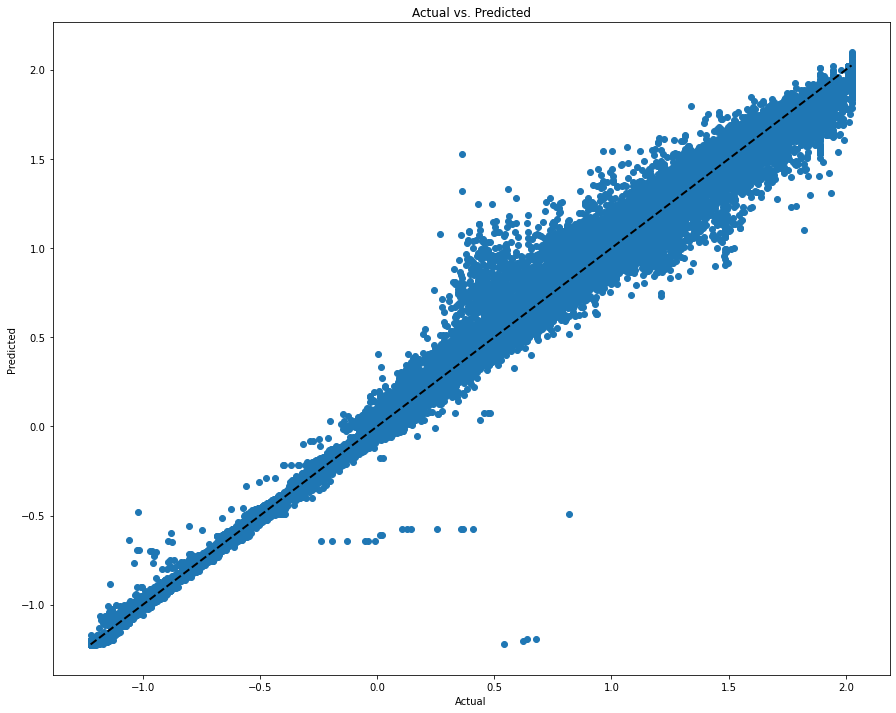

In [57]:
model(lgb_model,x_n,y_n,metricdata,"Lightgbm",update_metric=False, plot=True)

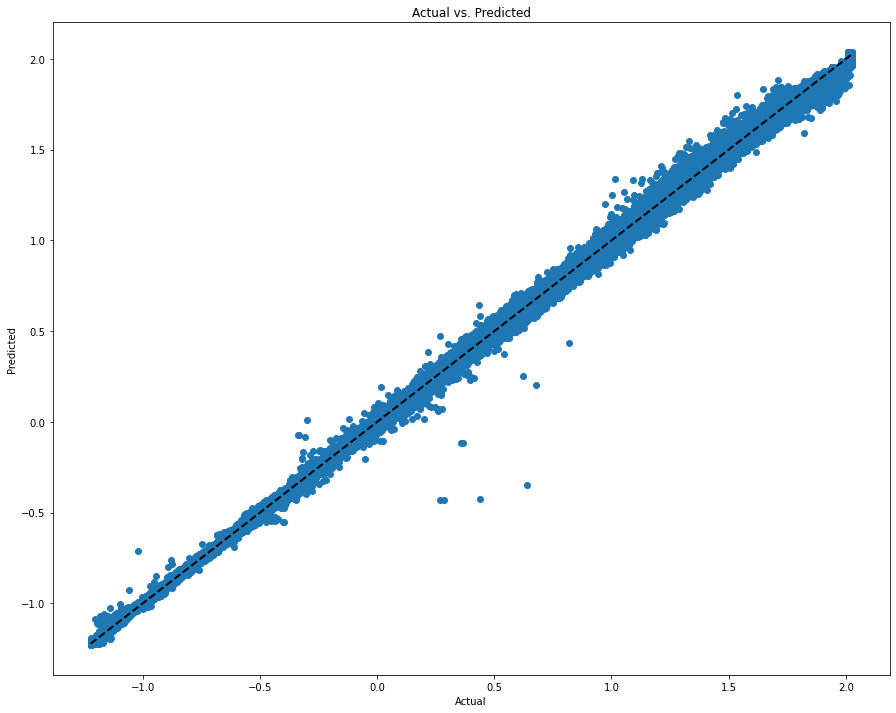

In [58]:
model(lgb_model,x,y,metricdata,"Lightgbm",update_metric=False, plot=True)

### LGBM Grid Search

In [64]:
model_lg = lgb.LGBMRegressor()
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbose': 0
}
# Define the hyperparameter grid to search
param_grid = {
    'num_leaves': [20, 31, 40],              # Number of leaves in each tree
    'learning_rate': [0.01, 0.05, 0.1],      # Learning rate (step size in update)
    'n_estimators': [50, 100, 200],          # Number of boosting rounds (iterations)
    'min_child_samples': [1, 5, 10]          # Minimum number of data instances per leaf
}
# Create the GridSearchCV object
grid_search_lgb = GridSearchCV(estimator=model_lg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)



# Perform the grid search to find the best hyperparameters

In [66]:
metricdata=model(grid_search_lgb,x,y,metricdata,"LightgbmGrid",update_metric=True)
metricdata

,Model,MSE,RMSE,MAE,R-Squared,Columns
0,LinearRegression,0.018673,0.136649,0.090581,0.983804,All
1,LinearRegression,0.047447,0.217824,0.150797,0.958848,6
2,ElasticNet,0.027178,0.164857,0.110026,0.976428,All
3,ElasticNet,0.047636,0.218257,0.149407,0.958684,6
4,Lightgbm,0.000412,0.020304,0.010952,0.999642,All
5,Lightgbm,0.002526,0.050258,0.023249,0.997809,6
6,LightgbmGrid,0.000205,0.01431,0.007656,0.999822,All


In [70]:
metricdata=model(grid_search_lgb,x_n,y_n,metricdata,"LightgbmGrid",update_metric=True)
metricdata

,Model,MSE,RMSE,MAE,R-Squared,Columns
0,LinearRegression,0.018673,0.136649,0.090581,0.983804,All
1,LinearRegression,0.047447,0.217824,0.150797,0.958848,6
2,ElasticNet,0.027178,0.164857,0.110026,0.976428,All
3,ElasticNet,0.047636,0.218257,0.149407,0.958684,6
4,Lightgbm,0.000412,0.020304,0.010952,0.999642,All
5,Lightgbm,0.002526,0.050258,0.023249,0.997809,6
6,LightgbmGrid,0.000205,0.01431,0.007656,0.999822,All
7,Lightgbmgrid,0.001375,0.037075,0.016236,0.998808,6
8,LightgbmGrid,0.001375,0.037075,0.016236,0.998808,6


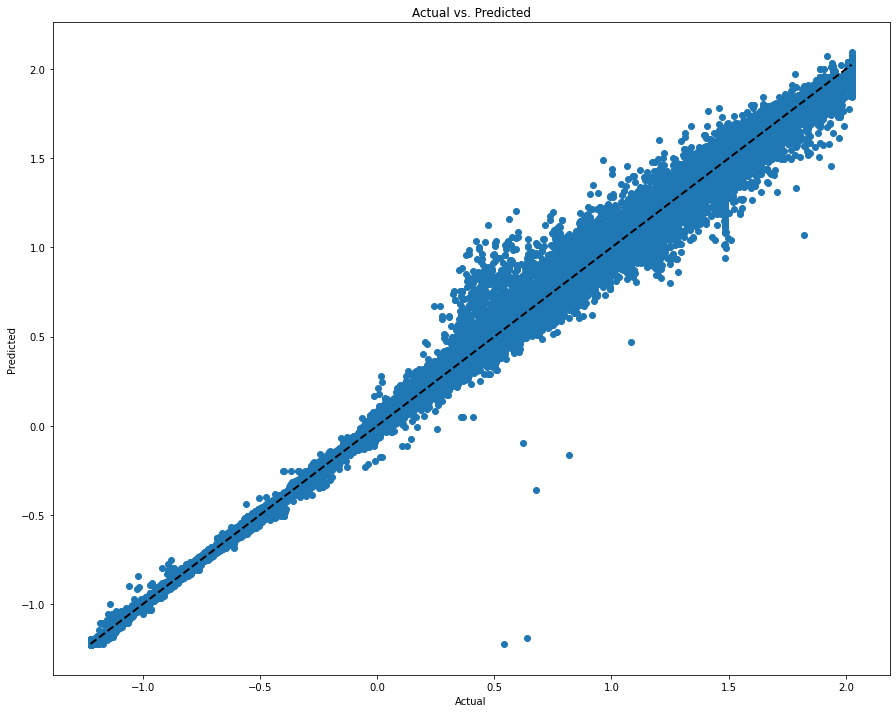

In [69]:
model(grid_search_lgb,x_n,y_n,metricdata,"LightgbmGrid",update_metric=False, plot=True)

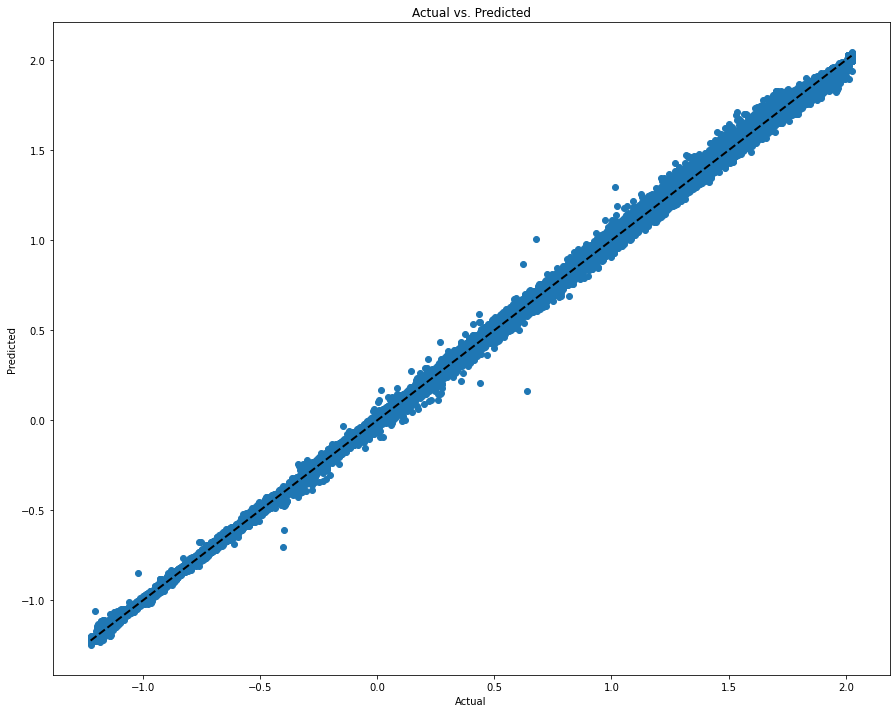

In [71]:
model(grid_search_lgb,x,y,metricdata,"LightgbmGrid",update_metric=False, plot=True)

In [72]:
best_model=grid_search_lgb.best_estimator_

In [73]:
import lightgbm as lgb
import pickle


with open('lightgbm_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [82]:
len(y_pred)

139959

In [83]:
len(y_test)

139959

In [86]:
pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

,y_test,y_pred
95966,-0.546062,-0.544138
454548,-1.222428,-1.328200
5592,2.024116,1.678708
380362,0.292804,0.169134
85950,-1.019527,-1.042450
...,...,...
203780,0.130299,0.164572
529153,0.840838,0.823910
69304,-0.646165,-0.585746
560689,-0.799579,-0.573355
